<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/Export_Landsat_TrainingData_3_4_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('raster','sf','fasterize'))
install.packages("googledrive")
install.packages("dplyr")
install.packages("devtools")

devtools:::install_github("gearslaboratory/gdalUtils")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘sp’, ‘Rcpp’, ‘terra’, ‘classInt’, ‘s2’, ‘units’, ‘wk’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’





R.methodsS3 (NA -> 1.8.2 ) [CRAN]
R.oo        (NA -> 1.26.0) [CRAN]
iterators   (NA -> 1.0.14) [CRAN]
R.utils     (NA -> 2.12.3) [CRAN]
foreach     (NA -> 1.5.2 ) [CRAN]


Skipping 1 packages not available: rgdal

Installing 6 packages: R.methodsS3, R.oo, iterators, rgdal, R.utils, foreach

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmphJk6Aj/remotes54841674e94/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmphJk6Aj/file5484932c9e2/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”


In [2]:
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
library(dplyr)
# library(gdalUtils)

drive_auth(use_oob = TRUE, cache = FALSE)

Loading required package: sp

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE


Attaching package: ‘fasterize’


The following object is masked from ‘package:graphics’:

    plot


The following object is masked from ‘package:base’:

    plot



Attaching package: ‘magrittr’


The following object is masked from ‘package:raster’:

    extract



Attaching package: ‘data.table’


The following object is masked from ‘package:raster’:

    shift



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:raster’:

    intersect, select, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.app

Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQVhRMHNxYXA2bm16cmpmN25Bcl9QX3lFdVZFalhLclQtTUdTVW5nbndlejlLRWQ2WHVDcWZraDJiSDRnUnMtQSIsInN0YXRlIjoiZWJiZmQ4NzU4NGY4OTVkYTQzNTc3NGQ2MTNlMzc2YmYifQ==


In [3]:
dir.create("/content/workingfolder")
dir.create("/content/workingfolder/nwi_utm4")
dir.create("/content/workingfolder/nwi_utm5")

dir.create("/content/workingfolder/aoi")
dir.create("/content/workingfolder/aoi/utm4")
dir.create("/content/workingfolder/aoi/utm5")

dir.create("/content/workingfolder/dem")
dir.create("/content/workingfolder/dem/utm4")
dir.create("/content/workingfolder/dem/utm5")

dir.create("/content/workingfolder/ccap")
dir.create("/content/workingfolder/ccap/utm4")
dir.create("/content/workingfolder/ccap/utm5")

dir.create("/content/workingfolder/nlcd")
dir.create("/content/workingfolder/nlcd/utm4")
dir.create("/content/workingfolder/nlcd/utm5")

# dir.create("/content/workingfolder/planet")
# dir.create("/content/workingfolder/planet/2018")
# dir.create("/content/workingfolder/planet/2018/utm4")
# dir.create("/content/workingfolder/planet/2018/utm5")

# dir.create("/content/workingfolder/planet/2019")
# dir.create("/content/workingfolder/planet/2019/utm4")
# dir.create("/content/workingfolder/planet/2019/utm5")

# dir.create("/content/workingfolder/planet/2020")
# dir.create("/content/workingfolder/planet/2020/utm4")
# dir.create("/content/workingfolder/planet/2020/utm5")

In [5]:
dir.create("/content/workingfolder/landsat")
dir.create("/content/workingfolder/landsat/2016")
dir.create("/content/workingfolder/landsat/2016/utm4")
dir.create("/content/workingfolder/landsat/2016/utm5")

dir.create("/content/workingfolder/landsat")
dir.create("/content/workingfolder/landsat/2017")
dir.create("/content/workingfolder/landsat/2017/utm4")
dir.create("/content/workingfolder/landsat/2017/utm5")

dir.create("/content/workingfolder/landsat")
dir.create("/content/workingfolder/landsat/2018")
dir.create("/content/workingfolder/landsat/2018/utm4")
dir.create("/content/workingfolder/landsat/2018/utm5")

dir.create("/content/workingfolder/landsat")
dir.create("/content/workingfolder/landsat/2019")
dir.create("/content/workingfolder/landsat/2019/utm4")
dir.create("/content/workingfolder/landsat/2019/utm5")

dir.create("/content/workingfolder/landsat")
dir.create("/content/workingfolder/landsat/2020")
dir.create("/content/workingfolder/landsat/2020/utm4")
dir.create("/content/workingfolder/landsat/2020/utm5")


Warning message in dir.create("/content/workingfolder/landsat"):
“'/content/workingfolder/landsat' already exists”
Warning message in dir.create("/content/workingfolder/landsat"):
“'/content/workingfolder/landsat' already exists”
Warning message in dir.create("/content/workingfolder/landsat"):
“'/content/workingfolder/landsat' already exists”
Warning message in dir.create("/content/workingfolder/landsat"):
“'/content/workingfolder/landsat' already exists”


In [ ]:
cl <- makeCluster(8)
########################################################################## load NWI data

# load NUMERIC nwi data
# https://drive.google.com/file/d/1NHOKJKTqlNeuDg4DlfYfM3evDTvp0q8S/view?usp=drive_link
# This file is the national wetland inventory vector file (for utm 4 islands = Kauai, Oahu, Molokai, Maui) that includes a column called wetland_ty_numeric numbered 1 - 7 for the 7 differenet wetland categories.
drive_download(file = as_id('1NHOKJKTqlNeuDg4DlfYfM3evDTvp0q8S'), path =  '/content/workingfolder/nwi_utm4/nwi_utm4.gpkg', overwrite = FALSE)

# https://drive.google.com/file/d/1vjY2D7TCsFj5Mcs3Wk5Gh0OV3MIPD_M4/view?usp=drive_link
# This file is the national wetland inventory vector file (for utm 5 island = Hawaii)that includes a column called wetland_ty_numeric numbered 1 - 7 for the 7 differenet wetland categories.
drive_download(file = as_id('1vjY2D7TCsFj5Mcs3Wk5Gh0OV3MIPD_M4'), path =  '/content/workingfolder/nwi_utm5/nwi_utm5.gpkg', overwrite = FALSE)




########################################################################## load AOI data

# https://drive.google.com/file/d/1AsyHxmJ7MUJHwEqXUG61OXQ6bz9mgvDH/view?usp=drive_link
# This file is the area of interest vector file (for utm 4 islands = Kauai, Oahu, Molokai, Maui) that outlines which areas of interest to clip data to.
drive_download(file = as_id("1AsyHxmJ7MUJHwEqXUG61OXQ6bz9mgvDH"),
path = "/content/workingfolder/aoi/utm4/aoi_utm4.gpkg", overwrite = FALSE)

# https://drive.google.com/file/d/1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc/view?usp=drive_link
# This file is the area of interest vector file (for utm 5 island = Hawaii) that outlines which areas of interest to clip data to.
drive_download(file = as_id("1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc"),
path = "/content/workingfolder/aoi/utm5/aoi_utm5.gpkg", overwrite = FALSE)




########################################################################## load DEM data

# load the dem (for utm 4 islands = Kauai, Oahu, Molokai, Maui) it also will load the Hawaii dem
# https://drive.google.com/drive/folders/1URF4YPEnWirmyWjmueyIgiYchcORWe6q?usp=drive_link
jp_folder = "1URF4YPEnWirmyWjmueyIgiYchcORWe6q"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/dem/utm4/', i_dir$name[1])
      )
    })
  }




########################################################################## load CCAP data

# load the ccap (for utm 4 islands = Kauai, Oahu, Molokai, Maui)
# https://drive.google.com/drive/folders/14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv?usp=drive_link
jp_folder = "14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/ccap/utm4/', i_dir$name[1])
      )
    })
  }



# load the ccap (for utm 5 island = Hawaii) DONT use/need ccap_hawaii_03_nad83
# https://drive.google.com/drive/folders/1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW?usp=drive_link
jp_folder = "1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/ccap/utm5/', i_dir$name[1])
      )
    })
  }





########################################################################## load NLCD data

# load the nlcd, utm 4 (for utm 4 islands = Kauai, Oahu, Molokai, Maui)
# https://drive.google.com/file/d/17tWhnoFP-VTrobjaMuTLwdLU15v7C0NC/view?usp=drive_link
drive_download(file = as_id('17tWhnoFP-VTrobjaMuTLwdLU15v7C0NC'), path =  '/content/workingfolder/nlcd/utm4/nlcd_utm4.tif', overwrite = FALSE)

# load the nlcd, utm 5 (for utm 5 island = Hawaii)
# https://drive.google.com/file/d/1mn_Q1q7HRA3Yh7oBS1KmBriUEtLVWovr/view?usp=drive_link
drive_download(file = as_id('1mn_Q1q7HRA3Yh7oBS1KmBriUEtLVWovr'), path =  '/content/workingfolder/nlcd/utm5/nlcd_utm5.tif', overwrite = FALSE)

stopCluster(cl)

In [ ]:
# cl <- makeCluster(8)

# ########################################################################## load utm 4 data

# # Load Planet 2018 utm4 select files
# # https://drive.google.com/drive/folders/1MEni7YBYIASkXr7gyu7qX-fdHuqM6N5D?usp=drive_link
# jp_folder = "1MEni7YBYIASkXr7gyu7qX-fdHuqM6N5D"
# folder_id = drive_get(as_id(jp_folder)) # get folder ID
# print(folder_id) #print folder ID

# # Find files in the folder
# files = drive_ls(folder_id)

# # Loop through directories and download files inside them
# for (i in seq_along(files$name)) {
#   i_dir <- files[i, ] # Select directory
#     try({

#       # Download files from the directory to the specified path
#       drive_download(
#         as_id(i_dir$id[1]),
#         path = paste0('/content/workingfolder/planet/2018/utm4/', i_dir$name[1])
#       )
#     })
#   }

# # Load Planet 2019 utm4 select files
# # https://drive.google.com/drive/folders/1H_U0dpWevAlfPVFUg-nB23OPpkDJdpOc?usp=drive_link
# jp_folder = "1H_U0dpWevAlfPVFUg-nB23OPpkDJdpOc"
# folder_id = drive_get(as_id(jp_folder)) # get folder ID
# print(folder_id) #print folder ID

# # Find files in the folder
# files = drive_ls(folder_id)

# # Loop through directories and download files inside them
# for (i in seq_along(files$name)) {
#   i_dir <- files[i, ] # Select directory
#     try({

#       # Download files from the directory to the specified path
#       drive_download(
#         as_id(i_dir$id[1]),
#         path = paste0('/content/workingfolder/planet/2019/utm4/', i_dir$name[1])
#       )
#     })
#   }


# # Load Planet 2020 utm4 select files
# # https://drive.google.com/drive/folders/1aNMaXoXikRdZlm2zU0-v-7jt3RD2YS64?usp=drive_link
# jp_folder = "1aNMaXoXikRdZlm2zU0-v-7jt3RD2YS64"
# folder_id = drive_get(as_id(jp_folder)) # get folder ID
# print(folder_id) #print folder ID

# # Find files in the folder
# files = drive_ls(folder_id)

# # Loop through directories and download files inside them
# for (i in seq_along(files$name)) {
#   i_dir <- files[i, ] # Select directory
#     try({

#       # Download files from the directory to the specified path
#       drive_download(
#         as_id(i_dir$id[1]),
#         path = paste0('/content/workingfolder/planet/2020/utm4/', i_dir$name[1])
#       )
#     })
#   }




# ########################################################################## load utm 5 data

# # Load Planet 2018 utm5 select files
# # https://drive.google.com/drive/folders/1Z0wBoXPjqfIiMQhGuyyRAoR6pGEjmFQt?usp=drive_link
# jp_folder = "1Z0wBoXPjqfIiMQhGuyyRAoR6pGEjmFQt"
# folder_id = drive_get(as_id(jp_folder)) # get folder ID
# print(folder_id) #print folder ID

# # Find files in the folder
# files = drive_ls(folder_id)

# # Loop through directories and download files inside them
# for (i in seq_along(files$name)) {
#   i_dir <- files[i, ] # Select directory
#     try({

#       # Download files from the directory to the specified path
#       drive_download(
#         as_id(i_dir$id[1]),
#         path = paste0('/content/workingfolder/planet/2018/utm5/', i_dir$name[1])
#       )
#     })
#   }

# # Load Planet 2019 utm5 select files
# # https://drive.google.com/drive/folders/1t0jg7SLiudy7LT4NuA-9kQelyPFKqgTb?usp=drive_link
# jp_folder = "1t0jg7SLiudy7LT4NuA-9kQelyPFKqgTb"
# folder_id = drive_get(as_id(jp_folder)) # get folder ID
# print(folder_id) #print folder ID

# # Find files in the folder
# files = drive_ls(folder_id)

# # Loop through directories and download files inside them
# for (i in seq_along(files$name)) {
#   i_dir <- files[i, ] # Select directory
#     try({

#       # Download files from the directory to the specified path
#       drive_download(
#         as_id(i_dir$id[1]),
#         path = paste0('/content/workingfolder/planet/2019/utm5/', i_dir$name[1])
#       )
#     })
#   }


# # Load Planet 2020 utm5 select files
# # https://drive.google.com/drive/folders/1mI_zSXDf3ribVWsQMtv9EhVkhCVCvRGU?usp=drive_link
# jp_folder = "1mI_zSXDf3ribVWsQMtv9EhVkhCVCvRGU"
# folder_id = drive_get(as_id(jp_folder)) # get folder ID
# print(folder_id) #print folder ID

# # Find files in the folder
# files = drive_ls(folder_id)

# # Loop through directories and download files inside them
# for (i in seq_along(files$name)) {
#   i_dir <- files[i, ] # Select directory
#     try({

#       # Download files from the directory to the specified path
#       drive_download(
#         as_id(i_dir$id[1]),
#         path = paste0('/content/workingfolder/planet/2020/utm5/', i_dir$name[1])
#       )
#     })
#   }

# stopCluster(cl)

In [6]:


cl <- makeCluster(8)

########################################################################## load utm 4 data

# Load landsat 2016 utm4 select files
# https://drive.google.com/drive/folders/1lPlszoe66Tj7uGblw0Rr_7a58qWQfJXT?usp=drive_link
jp_folder = "1lPlszoe66Tj7uGblw0Rr_7a58qWQfJXT"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/landsat/2016/utm4/', i_dir$name[1])
      )
    })
  }

# Load landsat 2017 utm4 select files
# https://drive.google.com/drive/folders/1QM3Y7PoGfx8UQtd1goEHcB33c5xqCjoo?usp=drive_link
jp_folder = "1QM3Y7PoGfx8UQtd1goEHcB33c5xqCjoo"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/landsat/2017/utm4/', i_dir$name[1])
      )
    })
  }


# Load landsat 2018 utm4 select files
# https://drive.google.com/drive/folders/14o61mR8ho_z20rBpipFZjn3FX4JYTYod?usp=drive_link
jp_folder = "14o61mR8ho_z20rBpipFZjn3FX4JYTYod"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/landsat/2018/utm4/', i_dir$name[1])
      )
    })
  }

# Load landsat 2019 utm4 select files
# https://drive.google.com/drive/folders/1LWGVl4o1l6g6wu3WzrzAv3_RwxfZDiPV?usp=drive_link
jp_folder = "1LWGVl4o1l6g6wu3WzrzAv3_RwxfZDiPV"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/landsat/2019/utm4/', i_dir$name[1])
      )
    })
  }


# Load landsat 2020 utm4 select files
# https://drive.google.com/drive/folders/1ROxl4fOptcn_V0L6rGIYtlyXVq4-TarC?usp=drive_link
jp_folder = "1ROxl4fOptcn_V0L6rGIYtlyXVq4-TarC"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/landsat/2020/utm4/', i_dir$name[1])
      )
    })
  }


########################################################################## load utm 5 data

# Load landsat 2016 utm5 select files
# https://drive.google.com/drive/folders/1YJhpkljBOMzEJsmab1LDD9gS1-hY3L2W?usp=drive_link
jp_folder = "1YJhpkljBOMzEJsmab1LDD9gS1-hY3L2W"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/landsat/2016/utm5/', i_dir$name[1])
      )
    })
  }

# Load landsat 2017 utm5 select files
# https://drive.google.com/drive/folders/1UCp686CVwKO-YABVIpxkzOG3vpCHuShX?usp=drive_link
jp_folder = "1UCp686CVwKO-YABVIpxkzOG3vpCHuShX"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/landsat/2017/utm5/', i_dir$name[1])
      )
    })
  }


# Load landsat 2018 utm5 select files
# https://drive.google.com/drive/folders/1h-3FfHogJO4GJUxj3mshz_77NA-SKVVo?usp=drive_link
jp_folder = "1h-3FfHogJO4GJUxj3mshz_77NA-SKVVo"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/landsat/2018/utm5/', i_dir$name[1])
      )
    })
  }

# Load landsat 2019 utm5 select files
# https://drive.google.com/drive/folders/16gmQUx8JiGr41vj6kfSSAHd23cNWg4ix?usp=drive_link
jp_folder = "16gmQUx8JiGr41vj6kfSSAHd23cNWg4ix"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/landsat/2019/utm5/', i_dir$name[1])
      )
    })
  }

# Load landsat 2020 utm5 select files
# https://drive.google.com/drive/folders/1jz-_oAIQwqI9Dsx7m_y9DDY1X1vQLT-v?usp=drive_link
jp_folder = "1jz-_oAIQwqI9Dsx7m_y9DDY1X1vQLT-v"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/landsat/2020/utm5/', i_dir$name[1])
      )
    })
  }


stopCluster(cl)

# A dribble: 1 × 3
  name         id                                drive_resource   
  <chr>        <drv_id>                          <list>           
1 landsat_2016 1lPlszoe66Tj7uGblw0Rr_7a58qWQfJXT <named list [34]>


File downloaded:

• landsat_2016_index.vrt <id: 1-8-kjCRdMenEQj4b9_iuGwqy4armXY5H>

Saved locally as:

• /content/workingfolder/landsat/2016/utm4/landsat_2016_index.vrt

File downloaded:

• maui2016_01.tif <id: 1mlo88qomkNu1Jf4RvT54Ny2un4c3vUZl>

Saved locally as:

• /content/workingfolder/landsat/2016/utm4/maui2016_01.tif

File downloaded:

• oahu2016_01.tif <id: 18DIJfnms71CYD4T0oHHeufwzeoKqxb3U>

Saved locally as:

• /content/workingfolder/landsat/2016/utm4/oahu2016_01.tif

File downloaded:

• molokai2016_01.tif <id: 1CSzjw5Z35Fs8VOHnSORvZ7GaQAD5cUQJ>

Saved locally as:

• /content/workingfolder/landsat/2016/utm4/molokai2016_01.tif

File downloaded:

• kauai2016_01.tif <id: 1XsUL-yFA3KUWfo6baWM_V5QzLr0u9iTD>

Saved locally as:

• /content/workingfolder/landsat/2016/utm4/kauai2016_01.tif



# A dribble: 1 × 3
  name         id                                drive_resource   
  <chr>        <drv_id>                          <list>           
1 landsat_2017 1QM3Y7PoGfx8UQtd1goEHcB33c5xqCjoo <named list [34]>


File downloaded:

• landsat_2017_index.vrt <id: 1-HroN4T1HQ_WSuhKhtHnYMwp8XK8Siv_>

Saved locally as:

• /content/workingfolder/landsat/2017/utm4/landsat_2017_index.vrt

File downloaded:

• kauai2017_01.tif <id: 1NklQUwrAkIowYPb2_t9a8VsuFl0uFuLy>

Saved locally as:

• /content/workingfolder/landsat/2017/utm4/kauai2017_01.tif

File downloaded:

• maui2017_01.tif <id: 1XwG-nvFtILdPNtzrHi_UllgCMGv2ES9P>

Saved locally as:

• /content/workingfolder/landsat/2017/utm4/maui2017_01.tif

File downloaded:

• molokai2017_01.tif <id: 1vfLya-6XGZe_Ey5uYGb09tobV7WohHzd>

Saved locally as:

• /content/workingfolder/landsat/2017/utm4/molokai2017_01.tif

File downloaded:

• oahu2017_01.tif <id: 1uzN5G0hHj1jOOnS9xJdzneC6Pd6DfXjy>

Saved locally as:

• /content/workingfolder/landsat/2017/utm4/oahu2017_01.tif



# A dribble: 1 × 3
  name         id                                drive_resource   
  <chr>        <drv_id>                          <list>           
1 landsat_2018 14o61mR8ho_z20rBpipFZjn3FX4JYTYod <named list [34]>


File downloaded:

• landsat_2018_index.vrt <id: 1-KPP3nmHzzWqnAhdqK4KmhtNjnpG1VG6>

Saved locally as:

• /content/workingfolder/landsat/2018/utm4/landsat_2018_index.vrt



Error in get_export_mime_type(mime_type) : 
  Not a recognized Google MIME type:
✖ application/vnd.google-apps.folder


File downloaded:

• molokai2018_01.tif <id: 1WVKbtjJrBwKAByrim3QOMuIO-KbdV8fD>

Saved locally as:

• /content/workingfolder/landsat/2018/utm4/molokai2018_01.tif

File downloaded:

• maui2018_01.tif <id: 1hhgj691Nf9tPQvkS3Un7bG1jUAglPNq8>

Saved locally as:

• /content/workingfolder/landsat/2018/utm4/maui2018_01.tif

File downloaded:

• kauai2018_01.tif <id: 1OoN446wVFLyCPKdkzYmLjj4BThp-V7kz>

Saved locally as:

• /content/workingfolder/landsat/2018/utm4/kauai2018_01.tif

File downloaded:

• oahu2018_01.tif <id: 1gK8df2NO0m5svyzENwYMakvF3G3Puvt6>

Saved locally as:

• /content/workingfolder/landsat/2018/utm4/oahu2018_01.tif



# A dribble: 1 × 3
  name         id                                drive_resource   
  <chr>        <drv_id>                          <list>           
1 landsat_2019 1LWGVl4o1l6g6wu3WzrzAv3_RwxfZDiPV <named list [34]>


File downloaded:

• landsat_2019_index.vrt <id: 1-UEFy0UzWNza68n5yHB7z2xXzZjiiJFa>

Saved locally as:

• /content/workingfolder/landsat/2019/utm4/landsat_2019_index.vrt

File downloaded:

• maui2019_01.tif <id: 1M3uZsgGr3PdmAK6U_-2AmZMDI7ccu222>

Saved locally as:

• /content/workingfolder/landsat/2019/utm4/maui2019_01.tif

File downloaded:

• molokai2019_01.tif <id: 1HAPz0fxXzGqRPYkdKSUPhwynGAgDpYyn>

Saved locally as:

• /content/workingfolder/landsat/2019/utm4/molokai2019_01.tif

File downloaded:

• kauai2019_01.tif <id: 1sWI-4d3X1_q9r7kE1EDo7Pfln5vZRYIV>

Saved locally as:

• /content/workingfolder/landsat/2019/utm4/kauai2019_01.tif

File downloaded:

• oahu2019_01.tif <id: 1WRoqC3DgRbSI6l_tO2XDiRVCNhDmmQoH>

Saved locally as:

• /content/workingfolder/landsat/2019/utm4/oahu2019_01.tif



# A dribble: 1 × 3
  name         id                                drive_resource   
  <chr>        <drv_id>                          <list>           
1 landsat_2020 1ROxl4fOptcn_V0L6rGIYtlyXVq4-TarC <named list [34]>


File downloaded:

• landsat_2020_index.vrt <id: 1-XtCbHuVvS3k-lqayZG741GKQvaMU2Ku>

Saved locally as:

• /content/workingfolder/landsat/2020/utm4/landsat_2020_index.vrt

File downloaded:

• maui2020_01.tif <id: 1Af-rbY1Tzo6ujKbXp9ZyxACvV8P0cFzH>

Saved locally as:

• /content/workingfolder/landsat/2020/utm4/maui2020_01.tif

File downloaded:

• kauai2020_01.tif <id: 1eKP574Wce49zm3vqhfoXwakYWluCsYWF>

Saved locally as:

• /content/workingfolder/landsat/2020/utm4/kauai2020_01.tif

File downloaded:

• molokai2020_01.tif <id: 1UUNknelkcvncwJNrlw1TjSt3c37PrQeT>

Saved locally as:

• /content/workingfolder/landsat/2020/utm4/molokai2020_01.tif

File downloaded:

• oahu2020_01.tif <id: 1DFgI9pZkP6fckDa1mTA67Gvfcg6zWTU0>

Saved locally as:

• /content/workingfolder/landsat/2020/utm4/oahu2020_01.tif



# A dribble: 1 × 3
  name                id                                drive_resource   
  <chr>               <drv_id>                          <list>           
1 landsat_hawaii_2016 1YJhpkljBOMzEJsmab1LDD9gS1-hY3L2W <named list [34]>


File downloaded:

• landsat_hawaii_2016_index.vrt <id: 1-_2FpB8_xTq4YEMJTiz3yuvMq-SfYtvg>

Saved locally as:

• /content/workingfolder/landsat/2016/utm5/landsat_hawaii_2016_index.vrt

File downloaded:

• hawaii2016_01.tif <id: 1S3dJPr5RojXg4nxFxZTc1gq7J_QQIxfO>

Saved locally as:

• /content/workingfolder/landsat/2016/utm5/hawaii2016_01.tif



# A dribble: 1 × 3
  name                id                                drive_resource   
  <chr>               <drv_id>                          <list>           
1 landsat_hawaii_2017 1UCp686CVwKO-YABVIpxkzOG3vpCHuShX <named list [34]>


File downloaded:

• landsat_hawaii_2017_index.vrt <id: 1-biC1BfORd4ioXEVinG4VdnNxZQVK323>

Saved locally as:

• /content/workingfolder/landsat/2017/utm5/landsat_hawaii_2017_index.vrt

File downloaded:

• hawaii2017_01.tif <id: 1vS7BNOXA25GDf2C4kBeVyge0v7DLuVy4>

Saved locally as:

• /content/workingfolder/landsat/2017/utm5/hawaii2017_01.tif



# A dribble: 1 × 3
  name                id                                drive_resource   
  <chr>               <drv_id>                          <list>           
1 landsat_hawaii_2018 1h-3FfHogJO4GJUxj3mshz_77NA-SKVVo <named list [34]>


File downloaded:

• landsat_hawaii_2018_index.vrt <id: 1-n8sCAyQp3Ba4u5ZnaPg_78wOR4Dzekk>

Saved locally as:

• /content/workingfolder/landsat/2018/utm5/landsat_hawaii_2018_index.vrt

File downloaded:

• hawaii2018_01.tif <id: 1IU9vyA6z13GLppVPsipQNezKR1a1KMBg>

Saved locally as:

• /content/workingfolder/landsat/2018/utm5/hawaii2018_01.tif



# A dribble: 1 × 3
  name                id                                drive_resource   
  <chr>               <drv_id>                          <list>           
1 landsat_hawaii_2019 16gmQUx8JiGr41vj6kfSSAHd23cNWg4ix <named list [34]>


File downloaded:

• landsat_hawaii_2019_index.vrt <id: 1-pHlY336LSNd2FrRRXW63rXyGZlBLB5U>

Saved locally as:

• /content/workingfolder/landsat/2019/utm5/landsat_hawaii_2019_index.vrt

File downloaded:

• hawaii2019_01.tif <id: 1wVnjMWK21PmV3e_zrMobhbgCPOWFamV2>

Saved locally as:

• /content/workingfolder/landsat/2019/utm5/hawaii2019_01.tif



# A dribble: 1 × 3
  name                id                                drive_resource   
  <chr>               <drv_id>                          <list>           
1 landsat_hawaii_2020 1jz-_oAIQwqI9Dsx7m_y9DDY1X1vQLT-v <named list [34]>


File downloaded:

• landsat_hawaii_2020_index.vrt <id: 1-putoLnPsroguAdrERZqoJ5PSdYHN7F1>

Saved locally as:

• /content/workingfolder/landsat/2020/utm5/landsat_hawaii_2020_index.vrt

File downloaded:

• hawaii2020_01.tif <id: 15Fw6QpZwUdf3ZEZOKT5306XUal3wMgkj>

Saved locally as:

• /content/workingfolder/landsat/2020/utm5/hawaii2020_01.tif



In [7]:
aoi_utm5 <- st_read("/content/workingfolder/aoi/utm5/aoi_utm5.gpkg")
aoi_utm5

Reading layer `aoi_wetland_hawaii' from data source 
  `/content/workingfolder/aoi/utm5/aoi_utm5.gpkg' using driver `GPKG'
Simple feature collection with 4 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 213311.3 ymin: 2182234 xmax: 288178.3 ymax: 2236783
Projected CRS: WGS 84 / UTM zone 5N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

id,layer,path,geom
<dbl>,<chr>,<chr>,<MULTIPOLYGON [m]>
1,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,MULTIPOLYGON (((285757 2182...
1,pololu,E:/Data/AOI_Shapefiles/hawaii/pololu.shp,MULTIPOLYGON (((213311.3 22...
1,waimanu,E:/Data/AOI_Shapefiles/hawaii/waimanu.shp,MULTIPOLYGON (((223006.9 22...
1,waipio,E:/Data/AOI_Shapefiles/hawaii/waipio.shp,MULTIPOLYGON (((226466.1 22...


In [8]:
aoi_utm5_dt <-as.data.table(aoi_utm5)
aoi_utm5_dt[,island:= path %>% substr(24,100) %>% gsub('.shp','',.) %>% gsub(layer,'',.) %>% gsub('/','',.),by=1:nrow(aoi_utm5_dt)]
# aoi_utm5_dt[,name:= path %>% substr(29,100) %>% gsub('.shp','',.) %>% gsub('/','',.),by=1:nrow(aoi_utm5_dt)]
# aoi_utm5_dt[layer =="lumahai", id := 1]
# aoi_utm5_dt[, lumahai := NULL]
aoi_utm5_dt[id == "1", id := 1:4]
aoi_utm5 <- aoi_utm5_dt %>% st_as_sf

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

id,layer,path,island,geom
<dbl>,<chr>,<chr>,<chr>,<MULTIPOLYGON [m]>
1,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,hawaii,MULTIPOLYGON (((285757 2182...
2,pololu,E:/Data/AOI_Shapefiles/hawaii/pololu.shp,hawaii,MULTIPOLYGON (((213311.3 22...
3,waimanu,E:/Data/AOI_Shapefiles/hawaii/waimanu.shp,hawaii,MULTIPOLYGON (((223006.9 22...
4,waipio,E:/Data/AOI_Shapefiles/hawaii/waipio.shp,hawaii,MULTIPOLYGON (((226466.1 22...


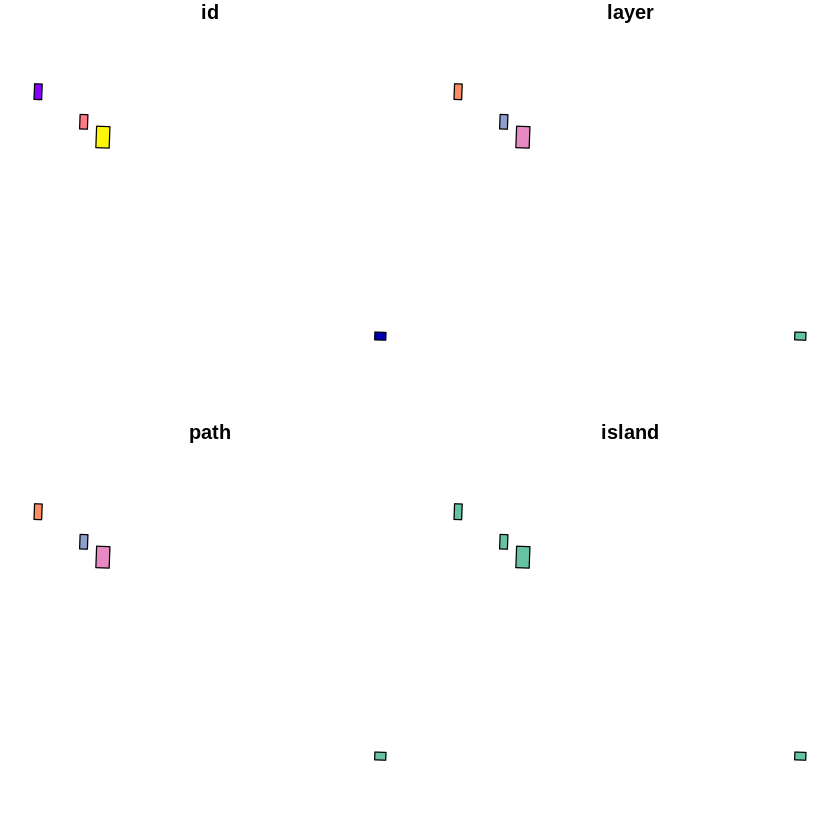

In [9]:
aoi_utm5
aoi_utm5 %>% plot

In [10]:
nlcd_utm5 <- raster("/content/workingfolder/nlcd/utm5/nlcd_utm5.tif")

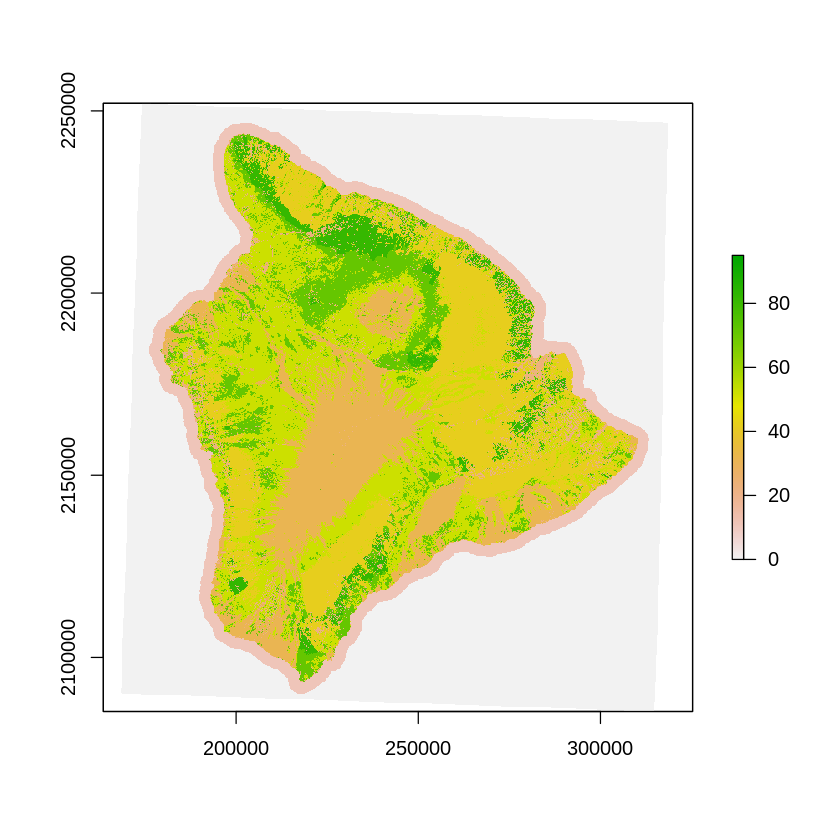

In [11]:
nlcd_utm5 %>% plot

In [ ]:
st_crs(nlcd_utm5)

In [13]:
nwi_utm5 <- st_read("/content/workingfolder/nwi_utm5/nwi_utm5.gpkg")
nwi_utm5

Reading layer `nwi_utm5_numeric' from data source 
  `/content/workingfolder/nwi_utm5/nwi_utm5.gpkg' using driver `GPKG'
Simple feature collection with 2105 features and 8 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 173408.4 ymin: 2087445 xmax: 316047.8 ymax: 2249339
Projected CRS: WGS 84 / UTM zone 5N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

objectid,attribute,acres,wetland_ty,st_areasha,st_perimet,value,wetland_ty_numeric,geom
<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [m]>
1,PUBHh,0.2609826,Freshwater Pond,1056.1591,121.4864,7,7,MULTIPOLYGON (((230022.7 21...
2,PUBHh,0.3178072,Freshwater Pond,1286.1200,129.4962,7,7,MULTIPOLYGON (((228629.6 21...
3,PUS3Ah,0.2185504,Freshwater Pond,884.4421,107.8919,7,7,MULTIPOLYGON (((226387.3 21...
4,PUS3Ah,0.4064771,Freshwater Pond,1644.9544,153.5977,7,7,MULTIPOLYGON (((225440.1 21...
5,PUS3Ch,0.2855907,Freshwater Pond,1155.7447,124.3542,7,7,MULTIPOLYGON (((226575.2 21...
6,PUS3Ch,0.4222651,Freshwater Pond,1708.8463,156.8640,7,7,MULTIPOLYGON (((228047.3 21...
7,PUS3Ch,0.1888957,Freshwater Pond,764.4338,99.7818,7,7,MULTIPOLYGON (((226417.9 21...
8,PUS3Ch,0.2335592,Freshwater Pond,945.1806,111.1221,7,7,MULTIPOLYGON (((225989.5 21...
9,PUS3Ch,0.2310241,Freshwater Pond,934.9212,111.1674,7,7,MULTIPOLYGON (((228259.3 21...


In [14]:
vrt_utm5_2016 <- stack("/content/workingfolder/landsat/2016/utm5/landsat_hawaii_2016_index.vrt")
# vrt_utm5_2019 <- stack("/content/workingfolder/planet/2019/utm5/2019_select_hawaii_vrt.vrt")
# vrt_utm5_2020 <- stack("/content/workingfolder/planet/2020/utm5/2020_select_hawaii_vrt.vrt")

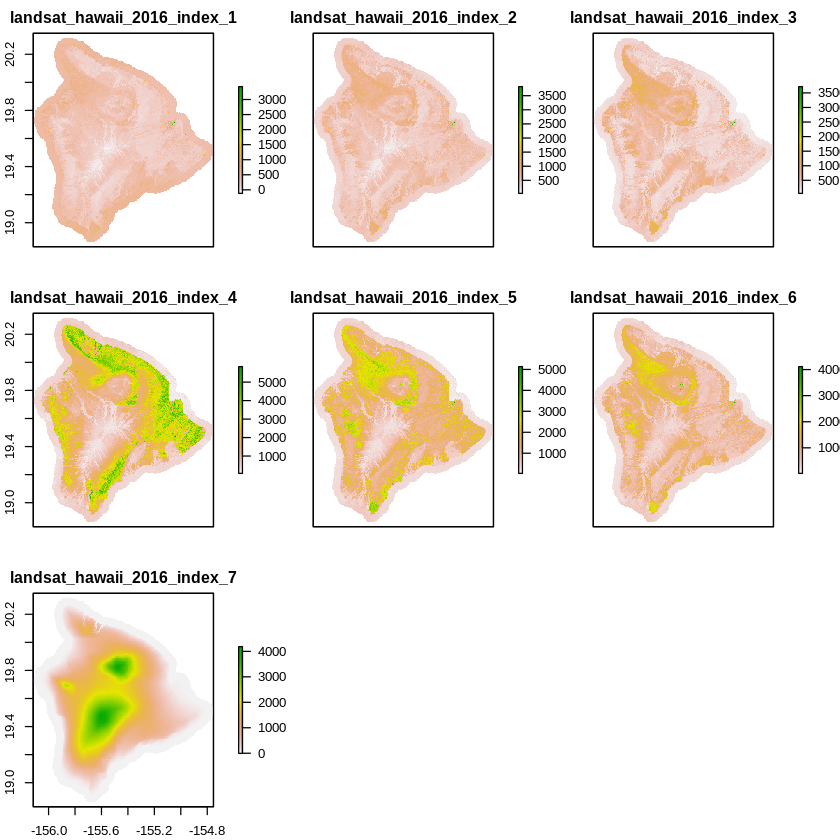

In [15]:
vrt_utm5_2016 %>% plot

In [16]:
unified_data_table <- data.table (unified = c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))
nwi_data_table <- data.table (nwi = list(-1, c(1,2,3), 4, 5, 6, 7, -1, -1, -1, -1, -1, -1))
nlcd_data_table <- data.table(nlcd = list(-1, 11, 90, 95, -1, -1, c(21,22,23,24), c(81,82), 71, 31, c(41,42,43), 52))
ccap_labels_data_table <- data.table(ccap = list(c(0,1), c(19,21), c(16,17,18), c(13,15), 14, c(22,23), c(2,3,4,5), c(6,7), 8, 20, c(9,10,11), 12))

unified_data_table_all <- data.table (
  unified_data_table,
  nwi_data_table,
  nlcd_data_table,
  ccap_labels_data_table)

In [18]:
# ccap_path =c('/content/workingfolder/ccap/utm4/kauai_ccap_2010.tif',
# '/content/workingfolder/ccap/utm4/oahu_ccap_2010.tif',
# '/content/workingfolder/ccap/utm4/molokai_ccap_2010.tif',
# '/content/workingfolder/ccap/utm4/maui_ccap_2010.tif')
# ccap_path_data_table <- data.table (ccap_path)

ccap_path =c('/content/workingfolder/ccap/utm5/hawaii_ccap_2010_01.tif',
'/content/workingfolder/ccap/utm5/hawaii_ccap_2010_02.tif',
'/content/workingfolder/ccap/utm5/hawaii_ccap_2010_03.tif')
ccap_path_data_table <- data.table (ccap_path)


# island = c('kauai','oahu','molokai','maui')
island = c('hawaii')
island_data_table <- data.table (island)


# dem_path =c('/content/workingfolder/dem/utm4/wgs84_kauai_10m.tif',
# '/content/workingfolder/dem/utm4/wgs84_oahu_dem.tif',
# '/content/workingfolder/dem/utm4/wgs84_molokai_dem.tif',
# '/content/workingfolder/dem/utm4/wgs84_maui_dem.tif')
# dem_path_data_table <- data.table (dem_path)

dem_path =c('/content/workingfolder/dem/utm5/wgs84_hawaii_dem.tif',
'/content/workingfolder/dem/utm5/wgs84_hawaii_dem.tif',
'/content/workingfolder/dem/utm5/wgs84_hawaii_dem.tif')
dem_path_data_table <- data.table (dem_path)

linked_dt <- data.table (
  island_data_table,
  ccap_path_data_table,
  dem_path_data_table)

linked_dt$ccap_raster <- linked_dt$ccap_path %>% lapply(stack)
linked_dt$dem_raster <- linked_dt$dem_path %>% lapply(stack)

In [19]:
linked_dt

island,ccap_path,dem_path,ccap_raster,dem_raster
<chr>,<chr>,<chr>,<list>,<list>
hawaii,/content/workingfolder/ccap/utm5/hawaii_ccap_2010_01.tif,/content/workingfolder/dem/utm5/wgs84_hawaii_dem.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>
hawaii,/content/workingfolder/ccap/utm5/hawaii_ccap_2010_02.tif,/content/workingfolder/dem/utm5/wgs84_hawaii_dem.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>
hawaii,/content/workingfolder/ccap/utm5/hawaii_ccap_2010_03.tif,/content/workingfolder/dem/utm5/wgs84_hawaii_dem.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>


In [28]:
#  Landsat grid at 3840,3840 pixels for 128 x 128
planet_fishnet_3840 <-
  1:nrow(aoi_utm5) %>% lapply(function(x){
    fishnet <- st_make_grid(aoi_utm5[x,], cellsize = c(3840,3840)) %>% st_as_sf %>% data.table
    fishnet$id <-1:length(fishnet)
    fishnet_int <- fishnet %>%
      st_as_sf() %>%
        st_intersection(aoi_utm5[x,]) %>%
          st_transform(st_crs(26905)) %>%
            data.table()
    fishnet <- fishnet[fishnet$id %in% fishnet_int$id ]

    fishnet$island <- aoi_utm5$island[x]
    fishnet$layer <- aoi_utm5$layer[x]



    return(fishnet)
    # print(fishnet)
    # print(class(fishnet))
    # print(st_crs(fishnet))
    # plot(fishnet)

  }) %>% rbindlist()

planet_fishnet_3840_sf <- st_as_sf(planet_fishnet_3840)
class(planet_fishnet_3840_sf)
st_crs(planet_fishnet_3840_sf)

planet_fishnet_3840_sf_transformed <- st_transform(planet_fishnet_3840_sf, crs = 26905)

st_crs(planet_fishnet_3840_sf_transformed)


st_write(planet_fishnet_3840_sf_transformed, "/content/sample_data/landsat_fishnet_3840_sf_utm5.gpkg", append=TRUE)



Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


[1] "sf"         "data.table" "data.frame"

Coordinate Reference System:
  User input: WGS 84 / UTM zone 5N 
  wkt:
PROJCRS["WGS 84 / UTM zone 5N",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 5N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT

Coordinate Reference System:
  User input: EPSG:26905 
  wkt:
PROJCRS["NAD83 / UTM zone 5N",
    BASEGEOGCRS["NAD83",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4269]],
    CONVERSION["UTM zone 5N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-153,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,

Updating layer `landsat_fishnet_3840_sf_utm5' to data source `/content/sample_data/landsat_fishnet_3840_sf_utm5.gpkg' using driver `GPKG'
Writing 5 features with 3 fields and geometry type Polygon.


Reading layer `landsat_fishnet_3840_sf_utm5' from data source 
  `/content/sample_data/landsat_fishnet_3840_sf_utm5.gpkg' using driver `GPKG'
Simple feature collection with 5 features and 3 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 213311 ymin: 2182233 xmax: 289596.5 ymax: 2237232
Projected CRS: NAD83 / UTM zone 5N


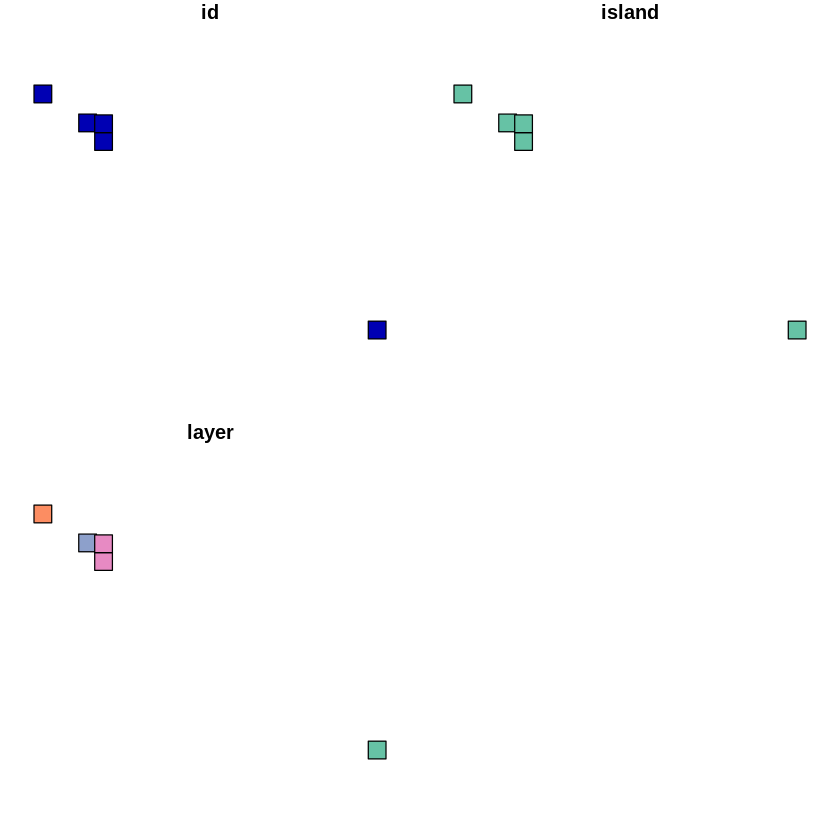

In [29]:
landsat_fishnet <- st_read("/content/sample_data/landsat_fishnet_3840_sf_utm5.gpkg")
landsat_fishnet %>% plot

In [ ]:
planet_fishnet_3840_sf_transformed %>% st_crs

In [30]:
dir.create("/content/testexports")

In [31]:
dir.create("/content/exports")
dir.create("/content/exports/image")
dir.create("/content/exports/dem")
dir.create("/content/exports/ccap_filled")
dir.create("/content/exports/nwi_ccap_filled")
dir.create("/content/exports/nwi_nlcd_filled")

In [33]:
################ UTM 5 for hawaii.

cl <- makeCluster(9)
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
library(dplyr)

# planet_fishnet_3840_sf aoi_utm4_wetland_fishnet_sf

placeholder <- c(1) %>% lapply(function(u){
test <- planet_fishnet_3840_sf_transformed[u,] %>% crop(vrt_utm5_2016,.)
test_extent <-extent(test)
test_extent_raster <- raster(nrow=3840, ncol=3840, ext=test_extent, crs=crs(26905)) # nrow=384, ncol=384 is necessary to ensure the width and height are correct!
test_extent_raster_size <- crop(resample(test, test_extent_raster, method = "ngb"), extent(test_extent_raster)) # this is the planet tiles!
crs(test_extent_raster_size) <- CRS("+init=epsg:26905")


test_nwi_crop <- nwi_utm5 %>% st_intersection(planet_fishnet_3840_sf_transformed[u,] %>% st_transform(st_crs(nwi_utm5))) %>%
  st_transform(st_crs(26905)) %>% fasterize(.,test_extent_raster_size[[1]], "wetland_ty_numeric")

test_nlcd_crop <- planet_fishnet_3840_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26905)) %>% crop(nlcd_utm5,.) %>%
  resample(test_extent_raster_size, method = "ngb")

test_dem_crop <- planet_fishnet_3840_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26905)) %>%
  crop(linked_dt[island ==planet_fishnet_3840_sf_transformed[u,]$island]$dem_raster[[1]],.) %>% resample(test_extent_raster_size, method= "ngb")

test_ccap_crop <- planet_fishnet_3840_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26905)) %>%
  crop(linked_dt[island ==planet_fishnet_3840_sf_transformed[u,]$island]$ccap_raster[[2]],.) %>% resample(test_extent_raster_size, method = "ngb")



nwi_harm <- test_nwi_crop
nlcd_harm <- test_nlcd_crop
ccap_harm <- test_ccap_crop

values(nwi_harm) <- -1
values(nlcd_harm) <- -1
values(ccap_harm) <- -1

for(i in 1:nrow(unified_data_table_all)){
 values(nwi_harm)[ values(test_nwi_crop %in% unified_data_table_all$nwi[[i]])] <- unified_data_table_all$unified[[i]]
 values(nlcd_harm)[ values(test_nlcd_crop %in% unified_data_table_all$nlcd[[i]])] <- unified_data_table_all$unified[[i]]
 values(ccap_harm)[ values(test_ccap_crop %in% unified_data_table_all$ccap[[i]])] <- unified_data_table_all$unified[[i]]

}

nwi_nlcd_filled <- nlcd_harm
values(nwi_nlcd_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
values(nwi_nlcd_filled)[values(nwi_nlcd_filled) ==-1] <- 12

nwi_ccap_filled <- ccap_harm
values(nwi_ccap_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
values(nwi_ccap_filled)[values(nwi_ccap_filled) ==-1] <- 12

ccap_filled <- ccap_harm
values(ccap_filled)[values(ccap_harm) !=-1] <- values(ccap_harm)[values(ccap_harm) !=-1]
values(ccap_filled)[values(ccap_filled) ==-1] <- 12



test_extent_raster_size %>% writeRaster(paste0('/content/testexports/', u,"_landsat2016",'.tif'),overwrite=T)


# test_extent_raster_size %>% writeRaster(paste0('/content/exports/image/', u,"_planet",'.tif'),overwrite=T)
# test_dem_crop %>% writeRaster(paste0('/content/exports/dem/', u, "_dem",'.tif'),overwrite=T)
# ccap_filled %>% writeRaster(paste0('/content/exports/ccap_filled/', u, "_ccap_filled",'.tif'),overwrite=T)
# nwi_nlcd_filled %>% writeRaster(paste0('/content/exports/nwi_nlcd_filled/', u, "_nwi_nlcd_filled",'.tif'),overwrite=T)
# nwi_ccap_filled %>% writeRaster(paste0('/content/exports/nwi_ccap_filled/', u, "_nwi_ccap_filled",'.tif'),overwrite=T)

})





# # https://drive.google.com/drive/folders/1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd?usp=drive_link

# # 1 images
# zip(zipfile = "/content/Planet_utm5_2018_export003_image.zip",
#     files = c("/content/exports/image"))
# drive_upload(media = "/content/Planet_utm5_2018_export003_image.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 2 dem
# zip(zipfile = "/content/Planet_utm5_2018_export003_dem.zip",
#     files = c("/content/exports/dem"))
# drive_upload(media = "/content/Planet_utm5_2018_export003_dem.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 3 ccap filled
# zip(zipfile = "/content/Planet_utm5_2018_export003_ccap_filled.zip",
#     files = c("/content/exports/ccap_filled"))
# drive_upload(media = "/content/Planet_utm5_2018_export003_ccap_filled.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 4 nwi ccap filled
# zip(zipfile = "/content/Planet_utm5_2018_export003_nwi_ccap_filled.zip",
#     files = c("/content/exports/nwi_ccap_filled"))
# drive_upload(media = "/content/Planet_utm5_2018_export003_nwi_ccap_filled.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 5 nwi nlcd filled
# zip(zipfile = "/content/Planet_utm5_2018_export003_nwi_nlcd_filled.zip",
#     files = c("/content/exports/nwi_nlcd_filled"))
# drive_upload(media = "/content/Planet_utm5_2018_export003_nwi_nlcd_filled.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))



# placeholder <- c(36:80) %>% lapply(function(u){
# test <- planet_fishnet_384_sf_transformed[u,] %>% crop(vrt_utm5_2020,.)
# test_extent <-extent(test)
# test_extent_raster <- raster(nrow=384, ncol=384, ext=test_extent, crs=crs(26905)) # nrow=384, ncol=384 is necessary to ensure the width and height are correct!
# test_extent_raster_size <- crop(resample(test, test_extent_raster, method = "ngb"), extent(test_extent_raster)) # this is the planet tiles!
# crs(test_extent_raster_size) <- CRS("+init=epsg:26905")


# test_nwi_crop <- nwi_utm5 %>% st_intersection(planet_fishnet_384_sf_transformed[u,] %>% st_transform(st_crs(nwi_utm5))) %>%
#   st_transform(st_crs(26905)) %>% fasterize(.,test_extent_raster_size[[1]], "wetland_ty_numeric")

# test_nlcd_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26905)) %>% crop(nlcd_utm5,.) %>%
#   resample(test_extent_raster_size, method = "ngb")

# test_dem_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26905)) %>%
#   crop(linked_dt[island ==planet_fishnet_384_sf_transformed[u,]$island]$dem_raster[[1]],.) %>% resample(test_extent_raster_size, method= "ngb")

# test_ccap_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26905)) %>%
#   crop(linked_dt[island ==planet_fishnet_384_sf_transformed[u,]$island]$ccap_raster[[1]],.) %>% resample(test_extent_raster_size, method = "ngb")



# nwi_harm <- test_nwi_crop
# nlcd_harm <- test_nlcd_crop
# ccap_harm <- test_ccap_crop

# values(nwi_harm) <- -1
# values(nlcd_harm) <- -1
# values(ccap_harm) <- -1

# for(i in 1:nrow(unified_data_table_all)){
#  values(nwi_harm)[ values(test_nwi_crop %in% unified_data_table_all$nwi[[i]])] <- unified_data_table_all$unified[[i]]
#  values(nlcd_harm)[ values(test_nlcd_crop %in% unified_data_table_all$nlcd[[i]])] <- unified_data_table_all$unified[[i]]
#  values(ccap_harm)[ values(test_ccap_crop %in% unified_data_table_all$ccap[[i]])] <- unified_data_table_all$unified[[i]]

# }

# nwi_nlcd_filled <- nlcd_harm
# values(nwi_nlcd_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
# values(nwi_nlcd_filled)[values(nwi_nlcd_filled) ==-1] <- 12

# nwi_ccap_filled <- ccap_harm
# values(nwi_ccap_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
# values(nwi_ccap_filled)[values(nwi_ccap_filled) ==-1] <- 12

# ccap_filled <- ccap_harm
# values(ccap_filled)[values(ccap_harm) !=-1] <- values(ccap_harm)[values(ccap_harm) !=-1]
# values(ccap_filled)[values(ccap_filled) ==-1] <- 12





# test_extent_raster_size %>% writeRaster(paste0('/content/exports/image/', u,"_planet",'.tif'),overwrite=T)
# test_dem_crop %>% writeRaster(paste0('/content/exports/dem/', u, "_dem",'.tif'),overwrite=T)
# ccap_filled %>% writeRaster(paste0('/content/exports/ccap_filled/', u, "_ccap_filled",'.tif'),overwrite=T)
# nwi_nlcd_filled %>% writeRaster(paste0('/content/exports/nwi_nlcd_filled/', u, "_nwi_nlcd_filled",'.tif'),overwrite=T)
# nwi_ccap_filled %>% writeRaster(paste0('/content/exports/nwi_ccap_filled/', u, "_nwi_ccap_filled",'.tif'),overwrite=T)

# })





# # https://drive.google.com/drive/folders/1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd?usp=drive_link

# # 1 images
# zip(zipfile = "/content/Planet_utm5_2018_export003_image.zip",
#     files = c("/content/exports/image"))
# drive_upload(media = "/content/Planet_utm5_2018_export003_image.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 2 dem
# zip(zipfile = "/content/Planet_utm5_2018_export003_dem.zip",
#     files = c("/content/exports/dem"))
# drive_upload(media = "/content/Planet_utm5_2018_export003_dem.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 3 ccap filled
# zip(zipfile = "/content/Planet_utm5_2018_export003_ccap_filled.zip",
#     files = c("/content/exports/ccap_filled"))
# drive_upload(media = "/content/Planet_utm5_2018_export003_ccap_filled.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 4 nwi ccap filled
# zip(zipfile = "/content/Planet_utm5_2018_export003_nwi_ccap_filled.zip",
#     files = c("/content/exports/nwi_ccap_filled"))
# drive_upload(media = "/content/Planet_utm5_2018_export003_nwi_ccap_filled.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 5 nwi nlcd filled
# zip(zipfile = "/content/Planet_utm5_2018_export003_nwi_nlcd_filled.zip",
#     files = c("/content/exports/nwi_nlcd_filled"))
# drive_upload(media = "/content/Planet_utm5_2018_export003_nwi_nlcd_filled.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))




# placeholder <- c(1:35) %>% lapply(function(u){
# test <- planet_fishnet_384_sf_transformed[u,] %>% crop(vrt_utm5_2020,.)
# test_extent <-extent(test)
# test_extent_raster <- raster(nrow=384, ncol=384, ext=test_extent, crs=crs(26905)) # nrow=384, ncol=384 is necessary to ensure the width and height are correct!
# test_extent_raster_size <- crop(resample(test, test_extent_raster, method = "ngb"), extent(test_extent_raster)) # this is the planet tiles!
# crs(test_extent_raster_size) <- CRS("+init=epsg:26905")


# test_nwi_crop <- nwi_utm5 %>% st_intersection(planet_fishnet_384_sf_transformed[u,] %>% st_transform(st_crs(nwi_utm5))) %>%
#   st_transform(st_crs(26905)) %>% fasterize(.,test_extent_raster_size[[1]], "wetland_ty_numeric")

# test_nlcd_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26905)) %>% crop(nlcd_utm5,.) %>%
#   resample(test_extent_raster_size, method = "ngb")

# test_dem_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26905)) %>%
#   crop(linked_dt[island ==planet_fishnet_384_sf_transformed[u,]$island]$dem_raster[[1]],.) %>% resample(test_extent_raster_size, method= "ngb")

# test_ccap_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26905)) %>%
#   crop(linked_dt[island ==planet_fishnet_384_sf_transformed[u,]$island]$ccap_raster[[3]],.) %>% resample(test_extent_raster_size, method = "ngb")



# nwi_harm <- test_nwi_crop
# nlcd_harm <- test_nlcd_crop
# ccap_harm <- test_ccap_crop

# values(nwi_harm) <- -1
# values(nlcd_harm) <- -1
# values(ccap_harm) <- -1

# for(i in 1:nrow(unified_data_table_all)){
#  values(nwi_harm)[ values(test_nwi_crop %in% unified_data_table_all$nwi[[i]])] <- unified_data_table_all$unified[[i]]
#  values(nlcd_harm)[ values(test_nlcd_crop %in% unified_data_table_all$nlcd[[i]])] <- unified_data_table_all$unified[[i]]
#  values(ccap_harm)[ values(test_ccap_crop %in% unified_data_table_all$ccap[[i]])] <- unified_data_table_all$unified[[i]]

# }

# nwi_nlcd_filled <- nlcd_harm
# values(nwi_nlcd_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
# values(nwi_nlcd_filled)[values(nwi_nlcd_filled) ==-1] <- 12

# nwi_ccap_filled <- ccap_harm
# values(nwi_ccap_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
# values(nwi_ccap_filled)[values(nwi_ccap_filled) ==-1] <- 12

# ccap_filled <- ccap_harm
# values(ccap_filled)[values(ccap_harm) !=-1] <- values(ccap_harm)[values(ccap_harm) !=-1]
# values(ccap_filled)[values(ccap_filled) ==-1] <- 12





# test_extent_raster_size %>% writeRaster(paste0('/content/exports/image/', u,"_planet",'.tif'),overwrite=T)
# test_dem_crop %>% writeRaster(paste0('/content/exports/dem/', u, "_dem",'.tif'),overwrite=T)
# ccap_filled %>% writeRaster(paste0('/content/exports/ccap_filled/', u, "_ccap_filled",'.tif'),overwrite=T)
# nwi_nlcd_filled %>% writeRaster(paste0('/content/exports/nwi_nlcd_filled/', u, "_nwi_nlcd_filled",'.tif'),overwrite=T)
# nwi_ccap_filled %>% writeRaster(paste0('/content/exports/nwi_ccap_filled/', u, "_nwi_ccap_filled",'.tif'),overwrite=T)

# })





# # https://drive.google.com/drive/folders/1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd?usp=drive_link

# # 1 images
# zip(zipfile = "/content/Planet_utm5_2020_export001_image.zip",
#     files = c("/content/exports/image"))
# drive_upload(media = "/content/Planet_utm5_2020_export001_image.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 2 dem
# zip(zipfile = "/content/Planet_utm5_2020_export001_dem.zip",
#     files = c("/content/exports/dem"))
# drive_upload(media = "/content/Planet_utm5_2020_export001_dem.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 3 ccap filled
# zip(zipfile = "/content/Planet_utm5_2020_export001_ccap_filled.zip",
#     files = c("/content/exports/ccap_filled"))
# drive_upload(media = "/content/Planet_utm5_2020_export001_ccap_filled.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 4 nwi ccap filled
# zip(zipfile = "/content/Planet_utm5_2020_export001_nwi_ccap_filled.zip",
#     files = c("/content/exports/nwi_ccap_filled"))
# drive_upload(media = "/content/Planet_utm5_2020_export001_nwi_ccap_filled.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 5 nwi nlcd filled
# zip(zipfile = "/content/Planet_utm5_2020_export001_nwi_nlcd_filled.zip",
#     files = c("/content/exports/nwi_nlcd_filled"))
# drive_upload(media = "/content/Planet_utm5_2020_export001_nwi_nlcd_filled.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))



stopCluster(cl)

ERROR: Error in .local(x, y, ...): extents do not overlap


In [ ]:
# https://drive.google.com/drive/folders/1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd?usp=drive_link

# # 1 images
# zip(zipfile = "/content/Planet_utm4_2020_export001_image.zip",
#     files = c("/content/exports/image"))
# drive_upload(media = "/content/Planet_utm4_2020_export001_image.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 2 dem
# zip(zipfile = "/content/Planet_utm4_2019_export001_dem.zip",
#     files = c("/content/exports/dem"))
# drive_upload(media = "/content/Planet_utm4_2019_export001_dem.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 3 ccap filled
# zip(zipfile = "/content/Planet_utm4_2019_export001_ccap_filled.zip",
#     files = c("/content/exports/ccap_filled"))
# drive_upload(media = "/content/Planet_utm4_2019_export001_ccap_filled.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 4 nwi ccap filled
# zip(zipfile = "/content/Planet_utm4_2019_export001_nwi_ccap_filled.zip",
#     files = c("/content/exports/nwi_ccap_filled"))
# drive_upload(media = "/content/Planet_utm4_2019_export001_nwi_ccap_filled.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))


# # 5 nwi nlcd filled
# zip(zipfile = "/content/Planet_utm4_2019_export001_nwi_nlcd_filled.zip",
#     files = c("/content/exports/nwi_nlcd_filled"))
# drive_upload(media = "/content/Planet_utm4_2019_export001_nwi_nlcd_filled.zip", path = as_id("1YI1xiB0HpJ23E_Pd6kgLCM3lqq1_7Qvd"))

Auto-refreshing stale OAuth token.

Local file:

• /content/Planet_utm4_2020_export001_image.zip

Uploaded into Drive file:

• Planet_utm4_2020_export001_image.zip <id: 1Vpg24XlNtyuGB-eCsk0tXarYWLIK7uCI>

With MIME type:

• application/zip

